<a href="https://colab.research.google.com/github/kozz84/Udemy/blob/main/Machine_Learning_A_Z.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# INTRO

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 1 - Data Preprocessing/Section 2 -------------------- Part 1 - Data Preprocessing --------------------/Python/Data.csv')

In [ ]:
#x = df.drop('Purchased', axis=1)
#x = df.iloc[:,0:3].values

x = df.iloc[:,:-1].values

np.nanmean(x[:,2],dtype='float32')

63777.777

In [ ]:
y = x = df.iloc[:,-1].values

In [ ]:
null_data = df[df.isnull().any(axis=1)]

In [ ]:
from sklearn.impute import SimpleImputer
sp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
sp.fit(x[:,1:3])

SimpleImputer()

In [ ]:
x[:,1:3]=sp.transform(x[:,1:3])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0] )],remainder='passthrough')

In [ ]:
ct.fit(x)

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoder', OneHotEncoder(), [0])])

In [ ]:
x = ct.transform(x)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y=le.fit_transform(y)

In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train[:,3:])

StandardScaler()

In [ ]:
X_train[:,3:] = scaler.transform(X_train[:,3:])
X_train

array([[1.0, 0.0, 0.0, 0.9518263102018367, 0.9861483149559838],
       [0.0, 1.0, 0.0, 0.2630675731713777, 0.12381477472917465],
       [1.0, 0.0, 0.0, -0.253501479601474, 0.46175623287088036],
       [0.0, 0.0, 1.0, -0.08131179534386676, -0.1675141687344727],
       [1.0, 0.0, 0.0, -0.5978808481166885, -0.48214945028445844],
       [1.0, 0.0, 0.0, 1.6405850472322658, 1.7202971168288956],
       [0.0, 0.0, 1.0, 0.05261351463427554, -1.1114198518898115],
       [0.0, 0.0, 1.0, -1.9753983221776066, -1.530933452960047]],
      dtype=object)

In [ ]:
X_test = scaler.transform(X_test[:,3:])

# Linear Reg

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 4 - Simple Linear Regression/Python/Salary_Data.csv')

In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
X= df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

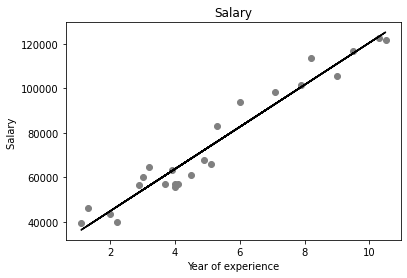

In [ ]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

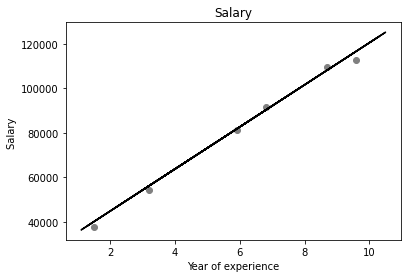

In [ ]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_train, lm.predict(X_train),color='black')
plt.title('Salary')
plt.xlabel('Year of experience')
plt.ylabel('Salary ')
plt.show()

In [ ]:
lm.predict([[5]])

array([73242.38682565])

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[9440.46383365]
26040.067657420906


# Multi linear

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 5 - Multiple Linear Regression/Python/50_Startups.csv')

In [ ]:
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df.head(1)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.8,471784.1,New York,192261.83


In [ ]:
X= df.drop(['Profit','State'],axis=1)
y = df['Profit']
States_dummies = pd.get_dummies(df['State'],drop_first=True)
X= pd.concat([X,States_dummies], axis=1)
X = X.values
y = y.values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
pred = [160000,130000,300000,0,0]

In [ ]:
lm.fit(X_train,y_train)

LinearRegression()

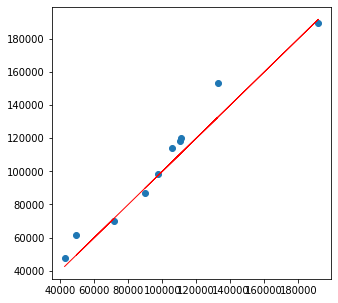

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red', linewidth=1)
plt.show()

In [ ]:
print(lm.predict([[160000, 130000, 300000,0,0]]))

[182377.68153823]


In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

6066.865715986147
66241729.62479818
8138.902237083216


In [ ]:
X= df.drop(['Profit'],axis=1)
y = df['Profit']

In [ ]:
States_dummies = pd.get_dummies(df['State'])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['State'])],remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train)
X_train[0]

array([1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 7.8013110e+04,
       1.2159755e+05, 2.6434606e+05])

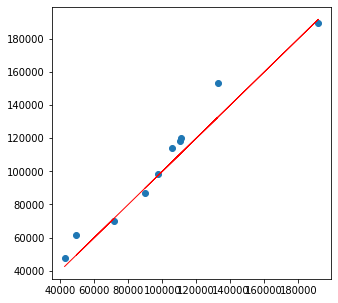

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test, color='red', linewidth=1)
plt.show()

In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

7068.317931582249
83628721.142752
9144.874036461739


# Polynominal Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

In [ ]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


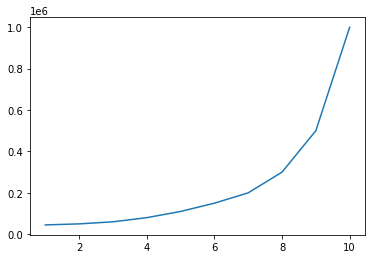

In [ ]:
plt.plot(data['Level'],data['Salary'])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lg = LinearRegression()

In [ ]:
lg.fit(data['Level'].values.reshape(-1,1),data['Salary'])

LinearRegression()

In [ ]:
y_pred = lg.predict(data['Level'].values.reshape(-1,1))

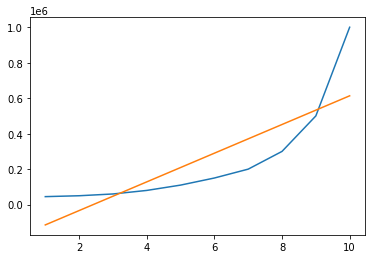

In [ ]:
plt.plot(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree=4)

In [ ]:
X_poly = poly_reg.fit_transform(data['Level'].values.reshape(-1,1))

In [ ]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [ ]:
lr_poly = LinearRegression()

In [ ]:
lr_poly.fit(X_poly, data['Salary'])

LinearRegression()

In [ ]:
y_pred_2 = lr_poly.predict(X_poly)

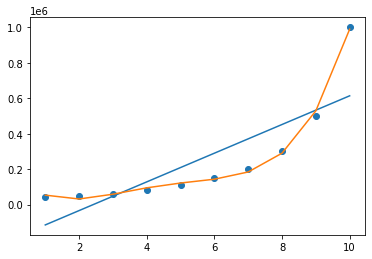

In [ ]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)
plt.plot(data['Level'],y_pred_2)

In [ ]:
def predict(x):
    print('Expected value:')
    print(data['Salary'][x])
    print('linear fit:')
    print(np.round(lg.predict([[x]])[0]))
    print('Polyfit fit:')
    print(np.round(lr_poly.predict(poly_reg.fit_transform(data['Level'].values.reshape(-1,1)))[0]))
predict(5)

Expected value:
150000
linear fit:
209061.0
Polyfit fit:
53357.0


In [ ]:
lg.predict([[6.5],[5]])

array([330378.78787879, 209060.60606061])

In [ ]:
data['Level'][5]

6

#SVR

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

In [ ]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data['Level'], data['Salary'], test_size=0.33, random_state=42)

In [ ]:
scaler_y = StandardScaler()
scaler_x = StandardScaler()

In [ ]:
y= scaler_y.fit_transform(data['Salary'].values.reshape(-1,1))

In [ ]:
X = scaler_x.fit_transform(data['Level'].values.reshape(-1,1))

In [ ]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [ ]:
from sklearn.svm import SVR

In [ ]:
svreg = SVR(kernel = 'rbf')

In [ ]:
svreg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_3 = svreg.predict(X)

In [ ]:
scaler_y.inverse_transform([y_pred_3])[0].shape

(10,)

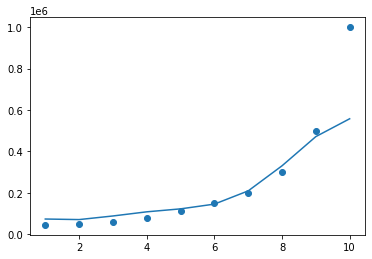

In [ ]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],scaler_y.inverse_transform([y_pred_3])[0])

# Decision Tree Regression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Level'].values.reshape(-1, 1), data['Salary'], test_size=0.01, random_state=11)

In [ ]:
dtr = DecisionTreeRegressor()

In [ ]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dtr.predict(data['Level'].values.reshape(-1, 1))

In [ ]:
prediction = dtr.predict([[6.5]])

In [ ]:
prediction

array([150000.])

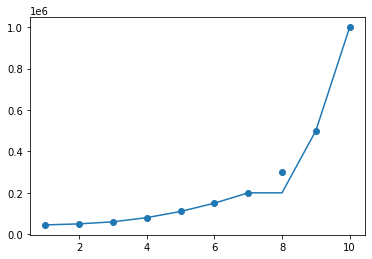

In [ ]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)

#Random Forest Intuition

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train = data['Level'].values.reshape(-1, 1)
y_train = data['Salary']

In [ ]:
rfr = RandomForestRegressor(n_estimators=10)

In [ ]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred = rfr.predict(data['Level'].values.reshape(-1, 1))

In [ ]:
prediction = dtr.predict([[6.5]])
prediction

array([150000.])

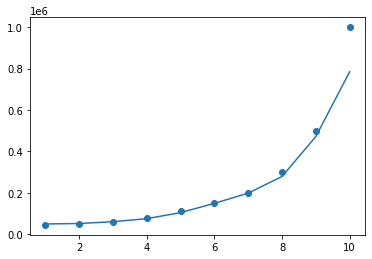

In [ ]:
X_pred = np.arange(0,10,0.01)

plt.scatter(data['Level'],data['Salary'])
plt.plot(data['Level'],y_pred)

In [ ]:
y_pred = rfr.predict(X_pred.reshape(-1,1))

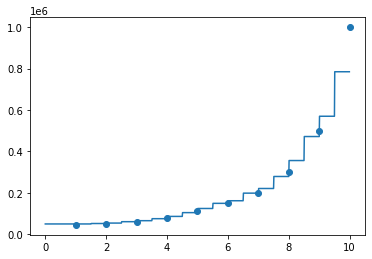

In [ ]:
plt.scatter(data['Level'],data['Salary'])
plt.plot(X_pred,y_pred)

#Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.linear_model import BayesianRidge,HuberRegressor,Ridge, LinearRegression

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
from sklearn.tree import DecisionTreeRegressor
models = {'DecisionTreeRegressor':DecisionTreeRegressor(),
            'RandomForestRegressor':RandomForestRegressor(),
        'SVR':SVR(),
     'XGBRegressor':XGBRegressor(),
     'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'RANSA': RANSACRegressor(),
    'Lasso':Lasso(),

          }

In [ ]:
r2 = []
model_names = []
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 2 - Regression/Section 6 - Polynomial Regression/Python/Position_Salaries.csv')
#data['Level'] = scaler.fit_transform(data['Level'].values.reshape(-1,1))
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#data['Salary'] = scaler.fit_transform(data['Salary'].values.reshape(-1,1))
for name,model in models.items():
    current = model.fit(data['Level'].values.reshape(-1, 1),
              data['Salary'])
    predicted = current.predict(data['Level'].values.reshape(-1, 1))
    score = r2_score(data['Salary'], predicted)
    r2.append(score)
   # model_results.append(score2)
    model_names.append(name)
    df_results = pd.DataFrame([model_names,r2])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'r2'}).sort_values(by='r2',ascending=False)
print(df_results)

[09:41:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                    Model        r2
0   DecisionTreeRegressor       1.0
3            XGBRegressor   0.99995
1   RandomForestRegressor  0.955705
8        LinearRegression  0.669041
10                  Lasso  0.669041
4                   Ridge  0.668945
5              ElasticNet  0.666857
6            SGDRegressor  0.583058
9                   RANSA  0.200513
7           BayesianRidge       0.0
2                     SVR -0.177024


# Logistic Regression

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 3 - Classification/Section 14 - Logistic Regression/Python/Social_Network_Ads.csv')

In [ ]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
data.groupby('Purchased').mean()

,Age,EstimatedSalary
Purchased,,
0,32.793774,60544.747082
1,46.391608,86272.727273


In [ ]:
X = data[['Age','EstimatedSalary']].values

In [ ]:
y = data['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#logistic_reg = KNeighborsClassifier()
logistic_reg = LogisticRegression()

In [ ]:
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_reg.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

332    0
111    0
352    1
205    0
56     0
      ..
304    0
187    0
166    0
64     0
27     1
Name: Purchased, Length: 80, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 5, 23]])

In [ ]:
accuracy_score(y_test,y_pred)

0.8875

In [ ]:
b = logistic_reg.intercept_[0]
w1, w2 = logistic_reg.coef_.T
c = -b/w2
m = -w1/w2

In [ ]:
xmin, xmax = data['Age'].min(), data['Age'].max()
ymin, ymax = data['EstimatedSalary'].min(), data['EstimatedSalary'].max()
xd = np.array([xmin, xmax])
yd = m*xd + c

In [ ]:
yd[0]=150000

In [ ]:
yd[1]=15000

In [ ]:
data['pediction'] = logistic_reg.predict(scaler.fit_transform(data[['Age','EstimatedSalary']].values))

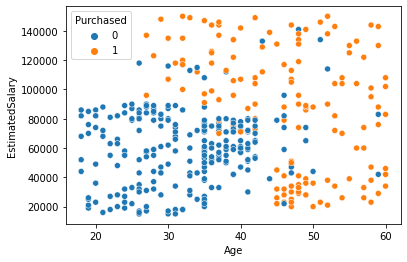

In [ ]:

sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='Purchased')

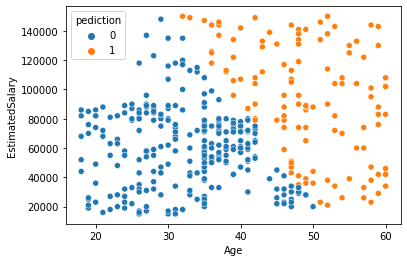

In [ ]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='pediction')

In [ ]:
from scipy.spatial import ConvexHull

#knn

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 3 - Classification/Section 14 - Logistic Regression/Python/Social_Network_Ads.csv')

In [ ]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier(n_neighbors=10)

In [ ]:
X = data[['Age','EstimatedSalary']].values
y = data['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knc.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
knc_pred = knc.predict(X_test)

In [ ]:
confusion_matrix(y_test,knc_pred)

array([[48,  4],
       [ 1, 27]])

In [ ]:
data['knc_pediction'] = knc.predict(scaler.fit_transform(data[['Age','EstimatedSalary']].values))

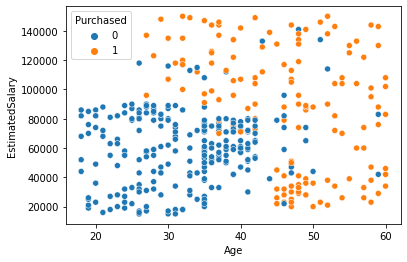

In [ ]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='Purchased')

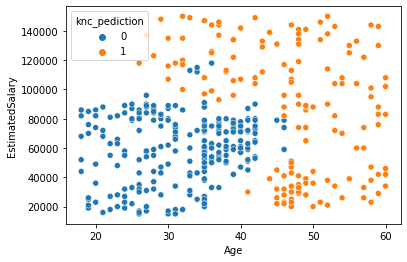

In [ ]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='knc_pediction')

# combined

In [11]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 3 - Classification/Section 14 - Logistic Regression/Python/Social_Network_Ads.csv')

In [12]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [13]:
X = data[['Age','EstimatedSalary']].values
y = data['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
models = {'KNeighborsClassifier':KNeighborsClassifier(),
          'LogisticRegression':LogisticRegression(),
          'SVC': SVC(),
          'DecisionTreeClassifier':DecisionTreeClassifier(criterion='entropy',random_state=0),
          'RandomForestClassifier':RandomForestClassifier(n_estimators=10,criterion='entropy'),
          'AdaBoostClassifier':AdaBoostClassifier(),
          'GaussianNB':GaussianNB()
         }

In [17]:
from sklearn.metrics import roc_curve

In [15]:
score = []
results = pd.DataFrame(y_test)
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score.append([name,accuracy_score(y_test,y_pred)])
    results[name] = y_pred
    roc_auc_score(y, y_score)
score = pd.DataFrame(score, columns=['model name', 'Accuracy'])
score.sort_values('Accuracy',ascending=False)

,model name,Accuracy
2,SVC,0.9500
0,KNeighborsClassifier,0.9375
4,RandomForestClassifier,0.9125
6,GaussianNB,0.9125
5,AdaBoostClassifier,0.9000
1,LogisticRegression,0.8875
3,DecisionTreeClassifier,0.8625


In [16]:
results

,Purchased,KNeighborsClassifier,LogisticRegression,SVC,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,GaussianNB
332,0,0,0,0,0,0,0,0
111,0,0,0,0,1,0,0,0
352,1,0,1,1,1,1,0,1
205,0,1,1,1,1,1,0,1
56,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
304,0,0,0,0,0,0,0,0
187,0,0,0,0,0,0,0,0
166,0,0,0,0,0,0,0,0
64,0,1,1,1,1,1,1,1


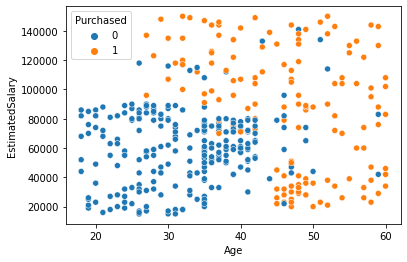

In [ ]:
sns.scatterplot(data=data,x='Age',y='EstimatedSalary',hue='Purchased')

In [ ]:
age_max = X[:,0].max()
age_min = X[:,0].min()
salary_max = X[:,1].max()
salary_min = X[:,1].min()

#Clustering

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 4 - Clustering/Section 24 - K-Means Clustering/Python/Mall_Customers.csv')

In [3]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [14]:
data = data.drop('CustomerID',axis=1)

In [166]:
X = data.iloc[:,2:4]

In [173]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


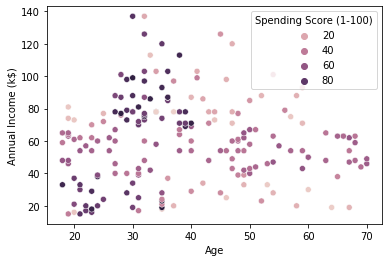

In [9]:
sns.scatterplot(data=data, x="Age", y='Annual Income (k$)', hue= 'Spending Score (1-100)')

In [131]:
from sklearn.cluster import KMeans

In [132]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[176108.78000000003,
 87121.56591478697,
 59486.961439280356,
 39529.88796736351,
 31659.353138717823,
 25481.76441516802,
 22053.135213805177,
 18806.360893141944,
 16048.239468251912,
 13699.672292968917]

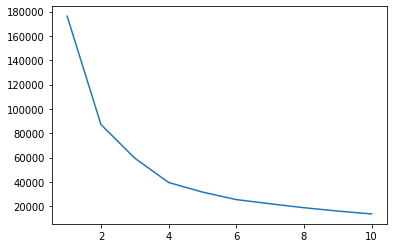

In [133]:
plt.plot(range(1,11),wcss)

In [146]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=1)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=1)

In [147]:
labels1=kmeans.labels_

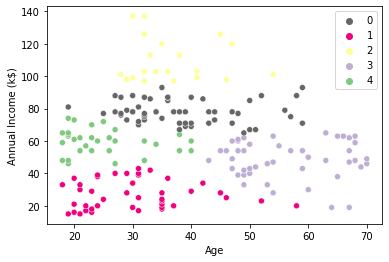

In [148]:
sns.scatterplot(data=data, x="Age", y='Annual Income (k$)', hue= labels1, palette='Accent_r')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

In [149]:
labels2 = kmeans.fit_predict(X)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 3, 3, 1, 3, 3, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

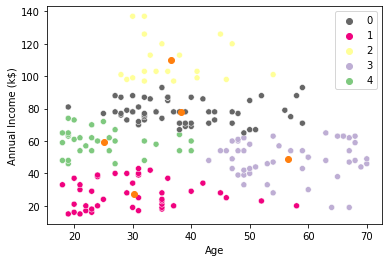

In [150]:
sns.scatterplot(data=data, x="Age", y='Annual Income (k$)', hue= labels2, palette='Accent_r')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])

In [151]:
 dif = labels1 - labels2

In [152]:
np.unique(dif)

array([0], dtype=int32)

In [153]:
dif

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [154]:
from scipy.cluster import hierarchy

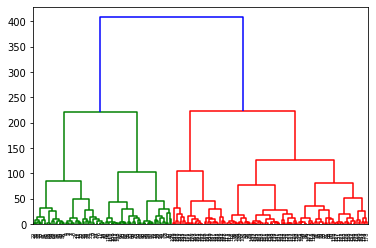

In [155]:
dendrogram = hierarchy.dendrogram(hierarchy.linkage(X,method='ward'))

In [168]:
from sklearn.cluster import AgglomerativeClustering

In [174]:
agg = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage='ward')

In [175]:
 y = agg.fit_predict(X)

In [176]:
agg.linkage

'ward'

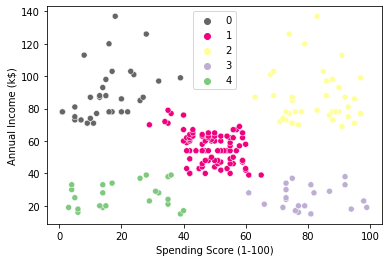

In [177]:
sns.scatterplot(data=data, x="Spending Score (1-100)", y='Annual Income (k$)', hue= y, palette='Accent_r')

# Association rules

In [38]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 5 - Association Rule Learning/Section 28 - Apriori/Python/Market_Basket_Optimisation.csv',header=None)

In [39]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
data 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
transactions = []

In [42]:
data.loc[0]

0                shrimp
1               almonds
2               avocado
3        vegetables mix
4          green grapes
5      whole weat flour
6                  yams
7        cottage cheese
8          energy drink
9          tomato juice
10       low fat yogurt
11            green tea
12                honey
13                salad
14        mineral water
15               salmon
16    antioxydant juice
17      frozen smoothie
18              spinach
19            olive oil
Name: 0, dtype: object

In [43]:
for i in range (0,7501):
    transactions.append([str(data.values[i,j]) for j in range(0,20)])

In [44]:
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [10]:
from apyori import apriori

In [11]:
rules = apriori(
    transactions = transactions,
    min_support = 0.003,
    min_confidence = 0.2,
    min_lift = 3,
    min_lenght = 2,
    max_length=2
    )

In [12]:
results = list(rules)

In [31]:
results_df = pd.DataFrame

In [35]:
for result in results:
    print(tuple(result[0])[1])

chicken
escalope
pasta
fromage blanc
herb & pepper
ground beef
olive oil
olive oil
pasta


In [14]:
results_df = pd.DataFrame

RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])

#Eclat

In [36]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 5 - Association Rule Learning/Section 28 - Apriori/Python/Market_Basket_Optimisation.csv',header=None)

In [37]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Upper Confidence Bound

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv')

In [3]:
data

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [31]:
import math
N = len(data)
d= len(data.columns)
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards =[0]*d
total_reward = 0

In [30]:
for n in range(0,N):
    ad = 0
    for i in  data.iloc[n]:
        print(i)
    break

1
0
0
0
1
0
0
0
1
0


In [32]:
math.sqrt(4)

2.0